<a href="https://colab.research.google.com/github/ManasviniDeepak/6thsem-ML-Lab/blob/main/1BM22CS336_Lab_3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LogisticRegression_Binary

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.3709834769552775

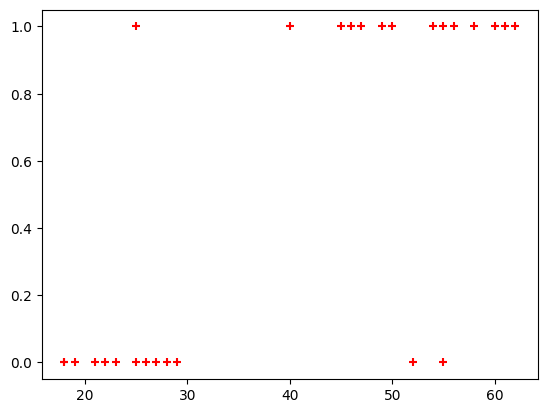

In [3]:
import pandas as pd
from matplotlib import pyplot as plt


df = pd.read_csv("/content/drive/MyDrive/insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86       

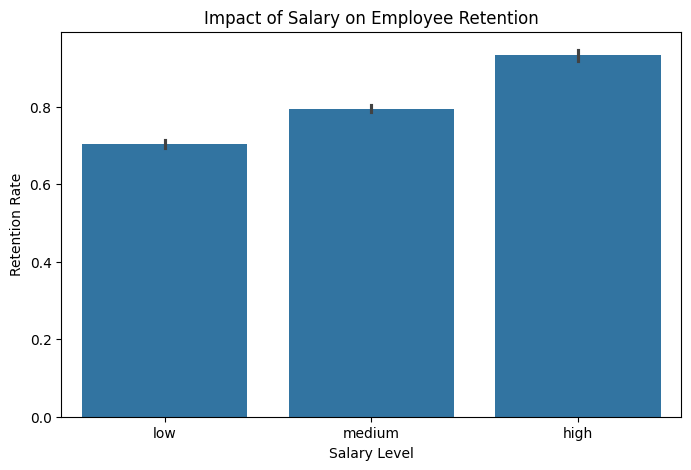

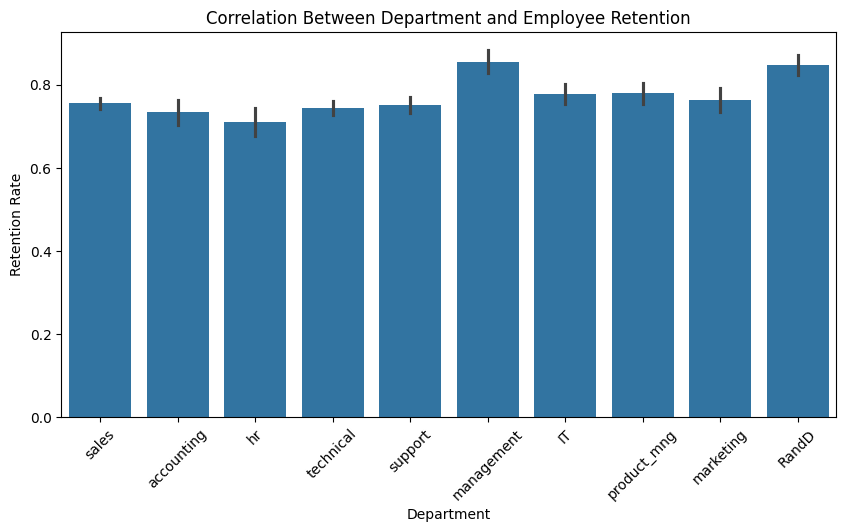

Logistic Regression Model Accuracy: 0.7960


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "HR_comma_sep.csv"  # Update the path if necessary
df = pd.read_csv("/content/drive/MyDrive/HR_comma_sep.csv")

# Exploratory Data Analysis (EDA)
df.info()
print(df.head())

# Plot bar chart for salary vs retention
plt.figure(figsize=(8, 5))
sns.barplot(x="salary", y="left", data=df, estimator=lambda x: (1 - x.mean()), order=["low", "medium", "high"])
plt.xlabel("Salary Level")
plt.ylabel("Retention Rate")
plt.title("Impact of Salary on Employee Retention")
plt.show()

# Plot bar chart for department vs retention
plt.figure(figsize=(10, 5))
sns.barplot(x="Department", y="left", data=df, estimator=lambda x: (1 - x.mean()), order=df["Department"].unique())
plt.xticks(rotation=45)
plt.xlabel("Department")
plt.ylabel("Retention Rate")
plt.title("Correlation Between Department and Employee Retention")
plt.show()

# Encode categorical variables
df_encoded = df.copy()
df_encoded["salary"] = df_encoded["salary"].map({"low": 0, "medium": 1, "high": 2})
df_encoded = pd.get_dummies(df_encoded, columns=["Department"], drop_first=True)

# Select features based on EDA
features = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_montly_hours",
    "time_spend_company",
    "Work_accident",
    "promotion_last_5years",
    "salary",
]

# Include department dummies in features
features += [col for col in df_encoded.columns if col.startswith("Department_")]

# Define X and y
X = df_encoded[features]
y = df_encoded["left"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")


# LogisticRegression_Multiclass

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


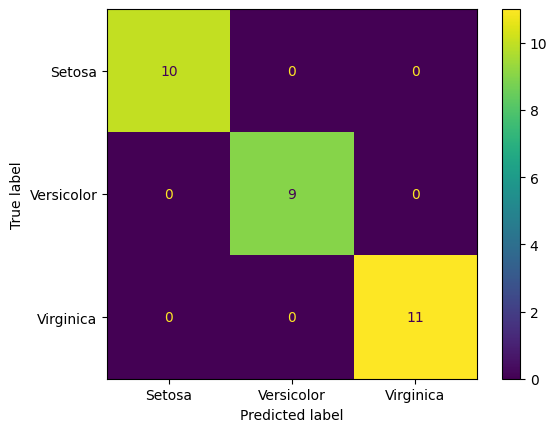

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("/content/drive/MyDrive/iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Model Accuracy: 0.9524

Classification Report:
              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00         8
        Bird       1.00      1.00      1.00         4
     Reptile       1.00      1.00      1.00         1
        Fish       1.00      1.00      1.00         3
   Amphibian       1.00      1.00      1.00         1
         Bug       0.67      1.00      0.80         2
Invertebrate       1.00      0.50      0.67         2

    accuracy                           0.95        21
   macro avg       0.95      0.93      0.92        21
weighted avg       0.97      0.95      0.95        21



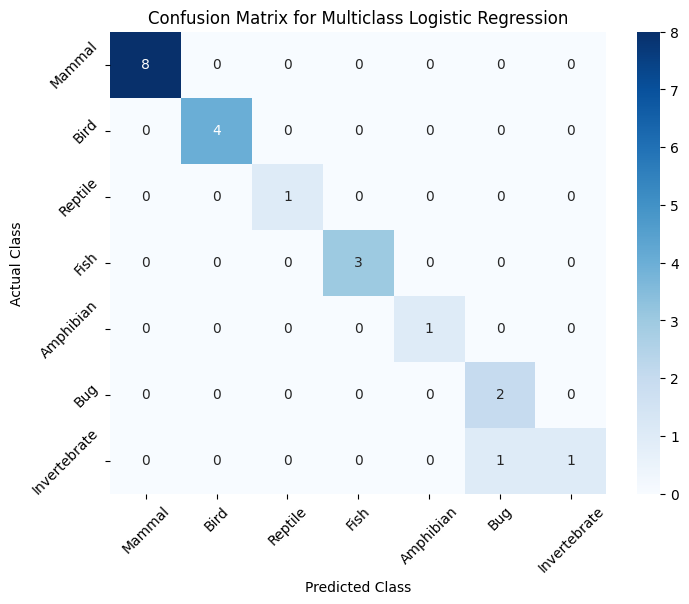

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the datasets
zoo_data_path = "/content/drive/MyDrive/zoo-data.csv"
zoo_class_path = "/content/drive/MyDrive/zoo-class-type.csv"

# Read the CSV files
zoo_df = pd.read_csv(zoo_data_path)
class_df = pd.read_csv(zoo_class_path)

# Create a mapping of class numbers to class names
class_mapping = dict(zip(class_df["Class_Number"], class_df["Class_Type"]))

# Drop the 'animal_name' column as it's not useful for modeling
zoo_df = zoo_df.drop(columns=["animal_name"])

# Define features (X) and target (y)
X = zoo_df.drop(columns=["class_type"])
y = zoo_df["class_type"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model for multiclass classification
multi_class_model = LogisticRegression(max_iter=1000, multi_class="multinomial", solver="lbfgs")
multi_class_model.fit(X_train, y_train)

# Predict on the test set
y_pred = multi_class_model.predict(X_test)

# Calculate accuracy
multi_class_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {multi_class_accuracy:.4f}\n")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Map class numbers to class names
class_labels = [class_mapping[i] for i in np.unique(y)]

# Print classification report (includes precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix for Multiclass Logistic Regression")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()